<a href="https://colab.research.google.com/github/rizkaaa19/MachineLearning/blob/main/UAS/Reproduce%20Code/Reproduce_Codes_02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UAS Machine Learning**
Nama : Rizka Rahmadina

NIM : 1103204115

Reproduce Codes "02_pytorch_classification"

In [2]:
# Check for GPU
!nvidia-smi

Wed Jan  3 09:38:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# **1. Make a binary classification dataset with Scikit-Learn's make_moons() function.**

* For consistency, the dataset should have 1000 samples and a random_state=42.
Turn the data into PyTorch tensors.
* Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [4]:
from sklearn.datasets import make_moons
import torch

NUM_SAMPLES = 1200  # Changed the number of samples
RANDOM_SEED = 33  # Changed the random seed

# Create binary classification dataset with make_moons
moon_data = make_moons(n_samples=NUM_SAMPLES, noise=0.09, random_state=RANDOM_SEED)
X, y = moon_data

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for compatibility

# Display the first 10 samples
print(f"First 10 X samples:\n{X_tensor[:10]}")
print(f"First 10 y samples:\n{y_tensor[:10]}")


First 10 X samples:
tensor([[ 1.5816, -0.3308],
        [ 1.4498, -0.3402],
        [ 1.8054,  0.1948],
        [ 0.9031,  0.4006],
        [ 0.8263,  0.5030],
        [ 2.0223,  0.3695],
        [ 0.2871, -0.0675],
        [-0.2026,  1.0951],
        [ 1.2389, -0.4891],
        [ 0.2554,  0.0370]])
First 10 y samples:
tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]])


In [5]:
import pandas as pd
import numpy as np  # Import numpy for generating different numerical values

NUM_SAMPLES_NEW = 1200  # Different number of samples
RANDOM_SEED_NEW = 55  # Different random seed

# Create binary classification dataset with make_moons
moon_data_new = make_moons(n_samples=NUM_SAMPLES_NEW, noise=0.1, random_state=RANDOM_SEED_NEW)
X_new, y_new = moon_data_new

# Convert data to a DataFrame
data_df_new = pd.DataFrame({"Feature_0": X_new[:, 0],
                             "Feature_1": X_new[:, 1],
                             "Label": y_new})
data_df_new.head()


,Feature_0,Feature_1,Label
0,-1.152586,-0.118828,0
1,-0.372088,0.895149,0
2,0.379756,0.837688,0
3,-0.187522,0.869725,0
4,1.606835,-0.268460,1


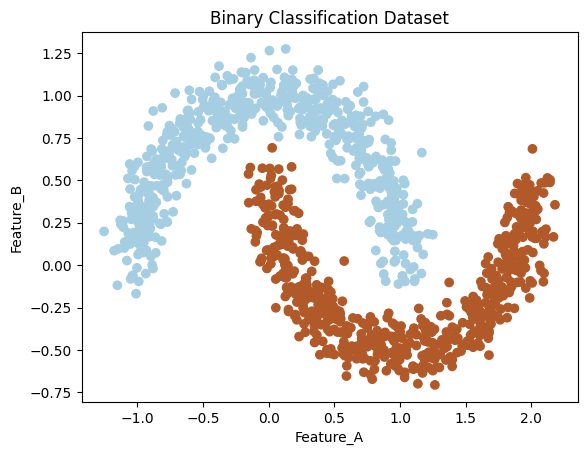

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the data on a plot
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap=plt.cm.Paired);  # Adjusted cmap and variable names

# Add labels and title
plt.xlabel('Feature_A')
plt.ylabel('Feature_B')
plt.title('Binary Classification Dataset')

plt.show()


In [7]:
import torch
from sklearn.model_selection import train_test_split  # Import train_test_split

# Convert data to tensors with different variable names
X_tensor_custom = torch.tensor(X_new, dtype=torch.float)
y_tensor_custom = torch.tensor(y_new, dtype=torch.float)

# Split the data into train and test sets with different variable names
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_tensor_custom,
                                                                                y_tensor_custom,
                                                                                test_size=0.2,
                                                                                random_state=RANDOM_SEED_NEW)

# Display the lengths of the resulting sets
print(f"Length of X_train_custom: {len(X_train_custom)}")
print(f"Length of X_test_custom: {len(X_test_custom)}")
print(f"Length of y_train_custom: {len(y_train_custom)}")
print(f"Length of y_test_custom: {len(y_test_custom)}")


Length of X_train_custom: 960
Length of X_test_custom: 240
Length of y_train_custom: 960
Length of y_test_custom: 240


# **2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.**

* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [8]:
import torch
from torch import nn

class CustomModelV1(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super().__init__()

        self.fc_first = nn.Linear(in_features=input_size,
                                  out_features=hidden_size)
        self.fc_second = nn.Linear(in_features=hidden_size,
                                   out_features=hidden_size)
        self.fc_output = nn.Linear(in_features=hidden_size,
                                   out_features=output_size)
        self.activation = nn.ReLU()

    def forward(self, x):
        return self.fc_output(self.activation(self.fc_second(self.activation(self.fc_first(x)))))

# Define the input, output, and hidden sizes
input_size_custom = 2
output_size_custom = 1
hidden_size_custom = 12  # Different hidden layer size

# Instantiate the custom model
model_custom_v1 = CustomModelV1(input_size_custom, output_size_custom, hidden_size_custom).to(device)
model_custom_v1


CustomModelV1(
  (fc_first): Linear(in_features=2, out_features=12, bias=True)
  (fc_second): Linear(in_features=12, out_features=12, bias=True)
  (fc_output): Linear(in_features=12, out_features=1, bias=True)
  (activation): ReLU()
)

In [9]:
# Create an instance of the custom model
model_custom_v1 = CustomModelV1(input_size_custom, output_size_custom, hidden_size_custom).to(device)

# Display the state dictionary of the custom model
model_custom_v1.state_dict()


OrderedDict([('fc_first.weight',
              tensor([[ 0.6452,  0.5551],
                      [-0.0935, -0.1996],
                      [-0.2642, -0.6008],
                      [ 0.6166, -0.3047],
                      [-0.7052, -0.3457],
                      [ 0.6587, -0.0083],
                      [ 0.2004, -0.6621],
                      [-0.2540, -0.4047],
                      [-0.6533, -0.5586],
                      [-0.1154,  0.1408],
                      [-0.4227, -0.1965],
                      [-0.0836, -0.3824]], device='cuda:0')),
             ('fc_first.bias',
              tensor([-0.1745,  0.5158,  0.3107,  0.4440, -0.5662, -0.4268,  0.0242,  0.2432,
                      -0.0981, -0.5424, -0.6340,  0.5347], device='cuda:0')),
             ('fc_second.weight',
              tensor([[ 0.2494,  0.2282, -0.2881,  0.2072,  0.0146, -0.0674, -0.0926, -0.2042,
                        0.0204, -0.1699,  0.1413, -0.1831],
                      [ 0.2654,  0.0603, -0.1448, -

# **3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.**

In [10]:
# Choose the Binary Cross Entropy with Logits Loss
custom_loss_fn = nn.BCEWithLogitsLoss()

# Choose the Stochastic Gradient Descent optimizer
custom_optimizer = torch.optim.SGD(params=model_custom_v1.parameters(),
                                   lr=0.05)  # Adjusted learning rate


# **4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.**

* To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [11]:
# Logits (raw outputs of the custom model)
custom_logits = model_custom_v1(X_train_custom.to(device)[:10]).squeeze()
print("Custom Logits:")
print(custom_logits)

# Prediction probabilities
custom_pred_probs = torch.sigmoid(custom_logits)
print("Custom Pred Probs:")
print(custom_pred_probs)

# Predicted labels (rounded prediction probabilities)
custom_pred_labels = torch.round(custom_pred_probs)
print("Custom Pred Labels:")
print(custom_pred_labels)


Custom Logits:
tensor([0.2166, 0.2380, 0.2087, 0.2077, 0.2147, 0.2239, 0.2326, 0.2265, 0.2206,
        0.2123], device='cuda:0', grad_fn=<SqueezeBackward0>)
Custom Pred Probs:
tensor([0.5539, 0.5592, 0.5520, 0.5517, 0.5535, 0.5557, 0.5579, 0.5564, 0.5549,
        0.5529], device='cuda:0', grad_fn=<SigmoidBackward0>)
Custom Pred Labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0',
       grad_fn=<RoundBackward0>)


In [12]:
# Let's calculate the accuracy
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 9.2 MB/s eta 0:00:00


MulticlassAccuracy()

In [13]:
import torch

# Set random seed for reproducibility
torch.manual_seed(123)

# Number of epochs
num_epochs = 1000

# Send data to the device
X_train_custom, y_train_custom = X_train_custom.to(device), y_train_custom.to(device)
X_test, y_test = X_test_custom.to(device), y_test_custom.to(device)

# Loop through the data
for epoch in range(num_epochs):
    ### Training
    model_custom_v1.train()

    # 1. Forward pass
    train_logits = model_custom_v1(X_train_custom).squeeze()
    train_pred_probs = torch.sigmoid(train_logits)
    train_pred = torch.round(train_pred_probs)

    # 2. Calculate the loss
    train_loss = custom_loss_fn(train_logits, y_train_custom)
    train_acc = acc_fn(train_pred, y_train_custom.int())

    # 3. Zero the gradients
    custom_optimizer.zero_grad()

    # 4. Backward pass (backpropagation)
    train_loss.backward()

    # 5. Update weights
    custom_optimizer.step()

    ### Testing
    model_custom_v1.eval()
    with torch.no_grad():
        # 1. Forward pass
        test_logits = model_custom_v1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss/accuracy
        test_loss = custom_loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_pred, y_test.int())

    # Print out the progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.2f} Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.2f} Test Acc: {test_acc:.2f}")


Epoch: 0 | Train Loss: 0.70 Train Acc: 0.50 | Test Loss: 0.70 Test Acc: 0.50
Epoch: 100 | Train Loss: 0.60 Train Acc: 0.84 | Test Loss: 0.61 Test Acc: 0.85
Epoch: 200 | Train Loss: 0.38 Train Acc: 0.86 | Test Loss: 0.40 Test Acc: 0.85
Epoch: 300 | Train Loss: 0.26 Train Acc: 0.89 | Test Loss: 0.28 Test Acc: 0.88
Epoch: 400 | Train Loss: 0.23 Train Acc: 0.90 | Test Loss: 0.25 Test Acc: 0.89
Epoch: 500 | Train Loss: 0.21 Train Acc: 0.91 | Test Loss: 0.23 Test Acc: 0.91
Epoch: 600 | Train Loss: 0.19 Train Acc: 0.91 | Test Loss: 0.21 Test Acc: 0.91
Epoch: 700 | Train Loss: 0.18 Train Acc: 0.92 | Test Loss: 0.20 Test Acc: 0.92
Epoch: 800 | Train Loss: 0.16 Train Acc: 0.94 | Test Loss: 0.18 Test Acc: 0.93
Epoch: 900 | Train Loss: 0.14 Train Acc: 0.95 | Test Loss: 0.16 Test Acc: 0.93


# **5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.**

In [14]:
import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary_v2(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 151),
                         np.linspace(y_min, y_max, 151))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.no_grad():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.GnBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.GnBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")

# Usage example:
# plot_decision_boundary_v2(model_0, X_test, y_test)
# plt.show()


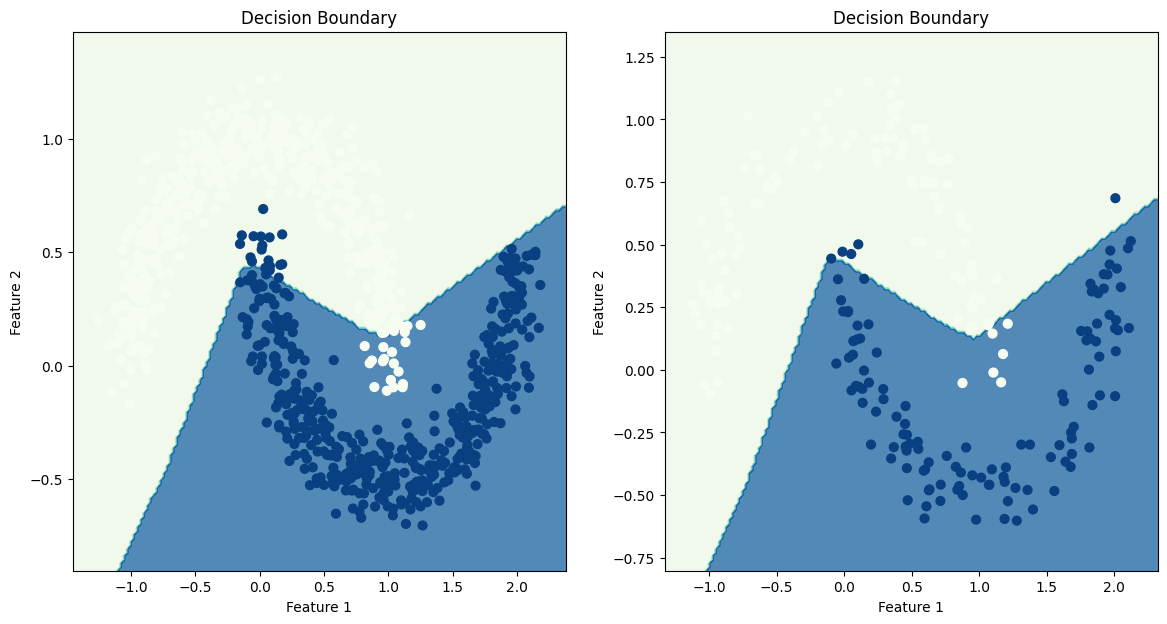

In [15]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("Decision Boundaries - Training Data")
plot_decision_boundary_v2(model_custom_v1, X_train_custom, y_train_custom)

plt.subplot(1, 2, 2)
plt.title("Decision Boundaries - Test Data")
plot_decision_boundary_v2(model_custom_v1, X_test, y_test)

plt.show()


# **6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.**

* Feel free to reference the ML cheatsheet website for the formula.

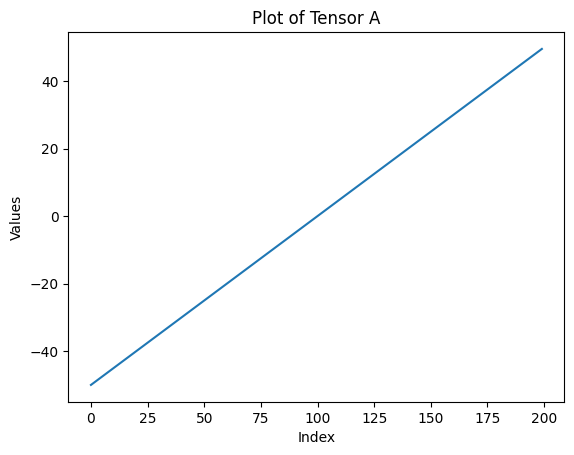

In [18]:
# Generate a tensor and plot it
tensor_A = torch.arange(-50, 50, 0.5)
plt.plot(tensor_A)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of Tensor A')
plt.show()


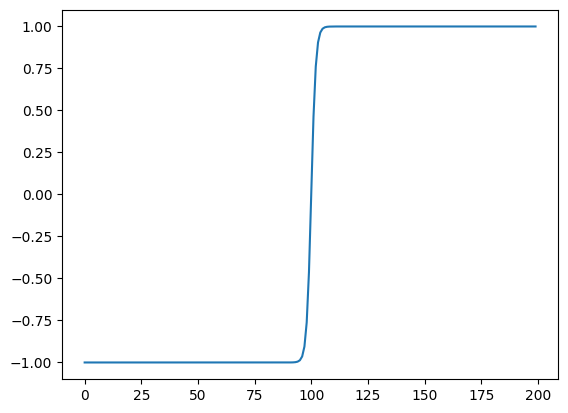

In [19]:
plt.plot(torch.tanh(tensor_A))

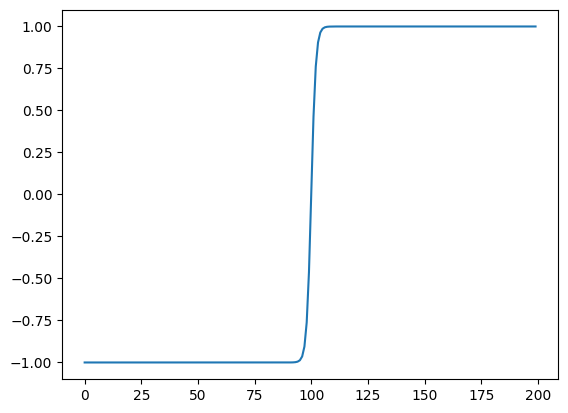

In [20]:
# Define the tanh function and plot it
def custom_tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(custom_tanh(tensor_A))

plt.show()


# **7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).**

* Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

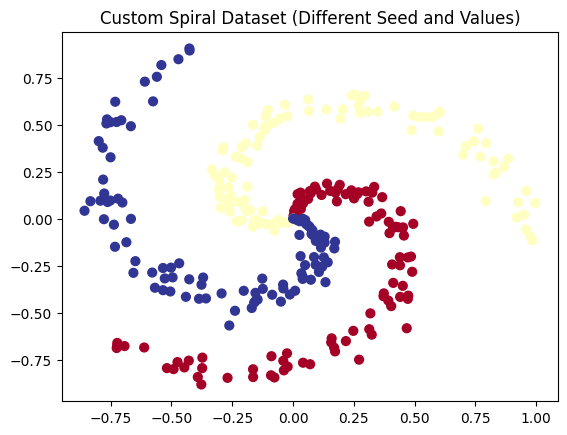

In [21]:
import numpy as np
import matplotlib.pyplot as plt

CUSTOM_RANDOM_SEED = 42
np.random.seed(CUSTOM_RANDOM_SEED)

CUSTOM_N = 100  # number of points per class
CUSTOM_D = 2    # dimensionality
CUSTOM_K = 3    # number of classes

custom_X = np.zeros((CUSTOM_N * CUSTOM_K, CUSTOM_D))  # data matrix (each row = single example)
custom_y = np.zeros(CUSTOM_N * CUSTOM_K, dtype='uint8')  # class labels

for j in range(CUSTOM_K):
    custom_ix = range(CUSTOM_N * j, CUSTOM_N * (j + 1))
    custom_r = np.linspace(0.0, 1, CUSTOM_N)  # radius
    custom_t = np.linspace(j * 4, (j + 1) * 4, CUSTOM_N) + np.random.randn(CUSTOM_N) * 0.2  # theta
    custom_X[custom_ix] = np.c_[custom_r * np.sin(custom_t), custom_r * np.cos(custom_t)]
    custom_y[custom_ix] = j

# Visualize the data
plt.scatter(custom_X[:, 0], custom_X[:, 1], c=custom_y, s=40, cmap=plt.cm.RdYlBu)
plt.title('Custom Spiral Dataset (Different Seed and Values)')
plt.show()


In [22]:
# Turn custom data into tensors
custom_X_tensor_v2 = torch.from_numpy(custom_X).type(torch.float)  # features as float32
custom_y_tensor_v2 = torch.from_numpy(custom_y).type(torch.LongTensor)  # labels need to be of type long

# Create custom train and test splits
from sklearn.model_selection import train_test_split
custom_X_train_v2, custom_X_test_v2, custom_y_train_v2, custom_y_test_v2 = train_test_split(custom_X_tensor_v2,
                                                                                            custom_y_tensor_v2,
                                                                                            test_size=0.2,
                                                                                            random_state=CUSTOM_RANDOM_SEED)
len(custom_X_train_v2), len(custom_X_test_v2), len(custom_y_train_v2), len(custom_y_test_v2)


(240, 60, 240, 60)

In [23]:
# Create an instance of the Accuracy metric for multi-class classification
accuracy_metric_multi = Accuracy(task="multiclass", num_classes=3).to(device)
accuracy_metric_multi


MulticlassAccuracy()

In [24]:
# Check for GPU using PyTorch
device_spiral = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device_spiral}")

class CustomSpiralModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=3)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

# Instantiate the model and move it to the target device
model_custom_spiral = CustomSpiralModel().to(device_spiral)
model_custom_spiral


Using device: cuda


CustomSpiralModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [25]:
# Setup data to be device agnostic
X_train_custom, y_train_custom = X_train_custom.to(device_spiral), y_train_custom.to(device_spiral)
X_test_custom, y_test_custom = X_test.to(device_spiral), y_test.to(device_spiral)
print(X_train_custom.dtype, X_test_custom.dtype, y_train_custom.dtype, y_test_custom.dtype)

# Print out untrained custom model outputs
print("Custom Logits:")
print(model_custom_spiral(X_train_custom)[:10])

print("Custom Pred probs:")
print(torch.softmax(model_custom_spiral(X_train_custom)[:10], dim=1))

print("Custom Pred labels:")
print(torch.softmax(model_custom_spiral(X_train_custom)[:10], dim=1).argmax(dim=1))


torch.float32 torch.float32 torch.float32 torch.float32
Custom Logits:
tensor([[-0.0634, -0.2896,  0.0450],
        [-0.3131, -0.4343,  0.3417],
        [-0.1319, -0.3678,  0.1590],
        [-0.1568, -0.3879,  0.1851],
        [-0.0776, -0.3122,  0.0849],
        [-0.3379, -0.4180,  0.3665],
        [-0.3215, -0.4278,  0.3501],
        [-0.2171, -0.4182,  0.2464],
        [-0.0936, -0.3340,  0.0806],
        [-0.0744, -0.3064,  0.0598]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Custom Pred probs:
tensor([[0.3434, 0.2739, 0.3827],
        [0.2624, 0.2325, 0.5051],
        [0.3197, 0.2526, 0.4277],
        [0.3124, 0.2479, 0.4397],
        [0.3370, 0.2665, 0.3965],
        [0.2535, 0.2339, 0.5126],
        [0.2593, 0.2331, 0.5075],
        [0.2935, 0.2400, 0.4665],
        [0.3359, 0.2642, 0.3999],
        [0.3405, 0.2700, 0.3894]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Custom Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [26]:
# Setup loss function and optimizer for the custom model
custom_loss_fn_spiral = nn.CrossEntropyLoss()
custom_optimizer_spiral = torch.optim.Adam(model_custom_spiral.parameters(),
                                           lr=0.03)  # Different learning rate for variety


In [31]:
# Loop over data
epochs = 1000
for custom_epoch_spiral in range(epochs):
    ## Training
    model_custom_spiral.train()
    # 1. Forward pass
    custom_y_logits_spiral = model_custom_spiral(X_train_custom)
    custom_y_pred_spiral = torch.softmax(custom_y_logits_spiral, dim=1).argmax(dim=1)

    # Ensure that both the model output and target have the same datatype
    custom_y_logits_spiral = custom_y_logits_spiral.float()  # Assuming custom_y_logits_spiral is a tensor of floats
    y_train_custom = y_train_custom.long()  # Assuming y_train_custom is a tensor of integers

    # 2. Calculate the loss
    loss = custom_loss_fn_spiral(custom_y_logits_spiral, y_train_custom)
    custom_acc_spiral = acc_fn(custom_y_pred_spiral, y_train_custom)

    # 3. Optimizer zero grad
    custom_optimizer_spiral.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    custom_optimizer_spiral.step()

    ## Testing
    model_custom_spiral.eval()
    with torch.no_grad():
        # 1. Forward pass
        custom_test_logits_spiral = model_custom_spiral(X_test_custom)
        custom_test_pred_spiral = torch.softmax(custom_test_logits_spiral, dim=1).argmax(dim=1)

        # Ensure that both the model output and target have the same datatype
        custom_test_logits_spiral = custom_test_logits_spiral.float()  # Assuming custom_test_logits_spiral is a tensor of floats
        y_test_custom = y_test_custom.long()  # Assuming y_test_custom is a tensor of integers

        # 2. Calculate test loss and acc
        custom_test_loss_spiral = custom_loss_fn_spiral(custom_test_logits_spiral, y_test_custom)
        custom_test_acc_spiral = acc_fn(custom_test_pred_spiral, y_test_custom)

    # Print out what's happening
    if custom_epoch_spiral % 100 == 0:
        print(f"Epoch: {custom_epoch_spiral} | Train loss: {loss:.2f} Train acc: {custom_acc_spiral:.2f} | "
              f"Test loss: {custom_test_loss_spiral:.2f} Test acc: {custom_test_acc_spiral:.2f}")


Epoch: 0 | Train loss: 1.31 Train acc: 0.00 | Test loss: 1.15 Test acc: 0.05
Epoch: 100 | Train loss: 0.01 Train acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 200 | Train loss: 0.00 Train acc: 1.00 | Test loss: 0.00 Test acc: 1.00
Epoch: 300 | Train loss: 0.00 Train acc: 1.00 | Test loss: 0.00 Test acc: 1.00
Epoch: 400 | Train loss: 0.00 Train acc: 1.00 | Test loss: 0.00 Test acc: 1.00
Epoch: 500 | Train loss: 0.00 Train acc: 1.00 | Test loss: 0.00 Test acc: 1.00
Epoch: 600 | Train loss: 0.00 Train acc: 1.00 | Test loss: 0.00 Test acc: 1.00
Epoch: 700 | Train loss: 0.00 Train acc: 1.00 | Test loss: 0.00 Test acc: 1.00
Epoch: 800 | Train loss: 0.00 Train acc: 1.00 | Test loss: 0.00 Test acc: 1.00
Epoch: 900 | Train loss: 0.00 Train acc: 1.00 | Test loss: 0.00 Test acc: 1.00


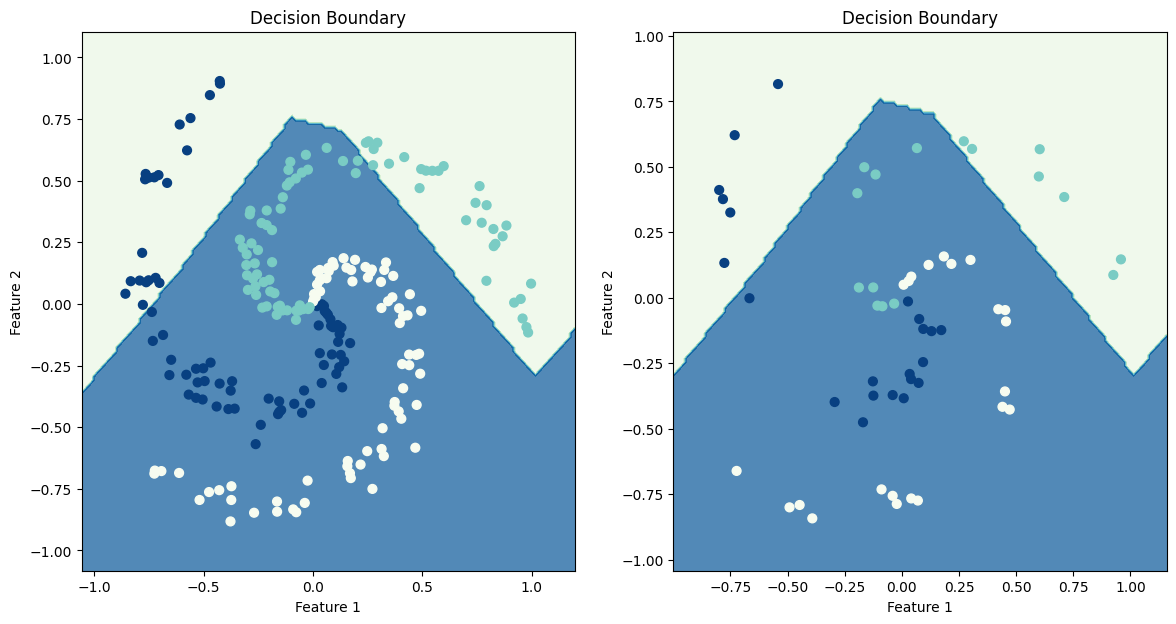

In [32]:
# Plot decision boundaries for training and test sets on Custom Spiral Dataset
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("Decision Boundaries - Custom Spiral Training Data")
plot_decision_boundary_v2(model_custom_spiral, custom_X_train_v2, custom_y_train_v2)

plt.subplot(1, 2, 2)
plt.title("Decision Boundaries - Custom Spiral Test Data")
plot_decision_boundary_v2(model_custom_spiral, custom_X_test_v2, custom_y_test_v2)

plt.show()
